<a href="https://colab.research.google.com/github/Vishal64B/Computer-Vision/blob/main/2347264_CV_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#P5. Demonstrate Wavelet transform to extract and display different frequency bands like LL, LH, HL, HH.
References :

https://pywavelets.readthedocs.io/en/latest/

https://youtu.be/JdVq8Tn1ds0?feature=shared

Task: Two-Level Wavelet Transform for Frequency Band Extraction in Medical Imaging
Objective: Analyze a medical image (e.g., an X-ray) using a two-level Wavelet Transform to
detect subtle features and observe variations in resolution.
1. Perform Two-Level Wavelet Transform
2. Apply the 2D Discrete Wavelet Transform (DWT) to the given X-ray image to
decompose it into frequency bands at two levels.
3. Extract Frequency Bands:
4. Decompose the image into the following frequency bands at both levels:

Level 1 Bands:

● LL1 (Low-Low): Low-frequency approximation, representing coarse details of the
image.

● LH1 (Low-High): Low-frequency in horizontal and high-frequency in vertical, emphasizing vertical edges.

● HL1 (High-Low): High-frequency in horizontal and low-frequency in vertical, emphasizing horizontal edges.

● HH1 (High-High): High-frequency details, capturing fine noise and sharp edges.

Level 2 Bands (decompose the LL1 band further):

● LL2 (Low-Low): Further low-frequency approximation, providing a more refined view of coarse details.

● LH2 (Low-High): Low-frequency in horizontal and high-frequency in vertical, highlighting vertical features at a finer resolution.

● HL2 (High-Low): High-frequency in horizontal and low-frequency in vertical, emphasizing horizontal features at a finer resolution.

● HH2 (High-High): High-frequency details, capturing finer noise and sharper edges.
5. Display and Analyze Sub-Bands
6. Display the resulting sub-bands from both levels. For each sub-band, provide a visual
representation and a detailed explanation of what it represents

7. Resolution Variation Analysis
8. Compare the frequency bands at both levels to observe resolution variation
● Discuss how the details presented in LL2, LH2, HL2, and HH2 compare to their
Level 1 counterparts.
● Analyze how increasing the level of decomposition affects the visibility of subtle
features in the image.

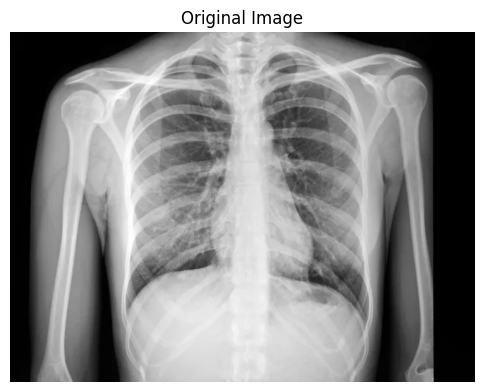

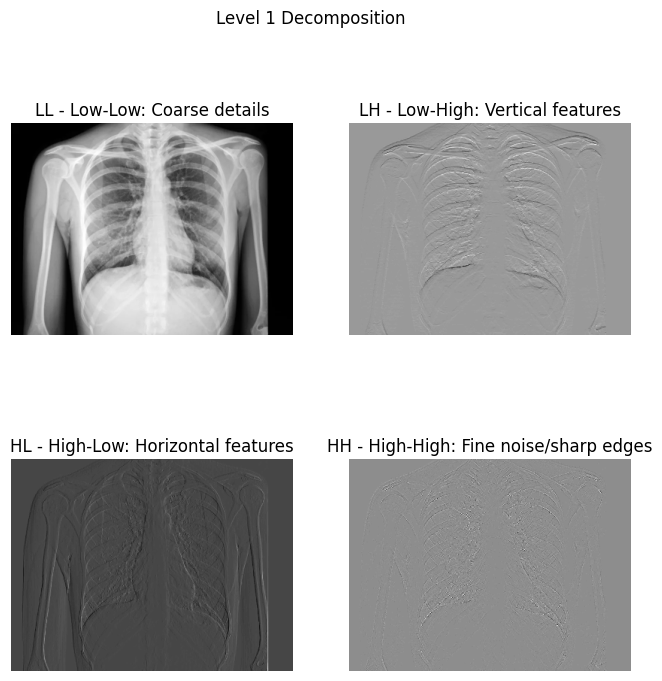

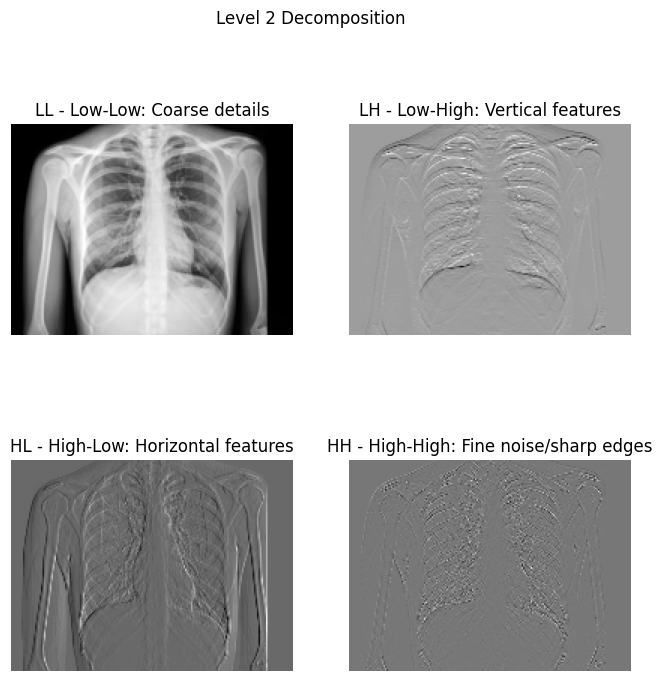

Resolution Variation Analysis:

Comparing LL1 and LL2:
- LL1 represents the coarse details at the first level, capturing general structure.
- LL2 further refines the coarse details from LL1, providing an even smoother view.

Comparing LH1 and LH2:
- LH1 captures vertical features but at a coarser resolution.
- LH2 highlights more subtle vertical features and edges at a finer resolution.

Comparing HL1 and HL2:
- HL1 emphasizes horizontal features, but details are less sharp compared to HL2.
- HL2 captures finer horizontal details, making subtle features more visible.

Comparing HH1 and HH2:
- HH1 captures sharp edges and noise but at a coarser scale.
- HH2 picks up even finer noise and sharp edges, emphasizing the finer texture in the image.


In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pywt

# Step 1: Load the image in grayscale
img = cv2.imread("image.webp", 0)

# Display the original image
plt.figure(figsize=(6, 6))
plt.axis("off")
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.show()

# Step 2: Perform the first level wavelet decomposition
coeffs1 = pywt.dwt2(img, 'haar')
LL1, (LH1, HL1, HH1) = coeffs1

# Step 3: Perform the second level wavelet decomposition on LL1
coeffs2 = pywt.dwt2(LL1, 'haar')
LL2, (LH2, HL2, HH2) = coeffs2

# Function to display sub-band images
def display_wavelet_subbands(LL, LH, HL, HH, title="Wavelet Decomposition"):
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))

    axs[0, 0].imshow(LL, cmap='gray')
    axs[0, 0].set_title('LL - Low-Low: Coarse details')
    axs[0, 0].axis("off")

    axs[0, 1].imshow(LH, cmap='gray')
    axs[0, 1].set_title('LH - Low-High: Vertical features')
    axs[0, 1].axis("off")

    axs[1, 0].imshow(HL, cmap='gray')
    axs[1, 0].set_title('HL - High-Low: Horizontal features')
    axs[1, 0].axis("off")

    axs[1, 1].imshow(HH, cmap='gray')
    axs[1, 1].set_title('HH - High-High: Fine noise/sharp edges')
    axs[1, 1].axis("off")

    plt.suptitle(title)
    plt.show()

# Step 4: Display Level 1 sub-bands
display_wavelet_subbands(LL1, LH1, HL1, HH1, title="Level 1 Decomposition")

# Step 5: Display Level 2 sub-bands (further decomposition of LL1)
display_wavelet_subbands(LL2, LH2, HL2, HH2, title="Level 2 Decomposition")

# Step 6: Analyze the resolution variation between Level 1 and Level 2
def analyze_resolution_variation(LL1, LL2, LH1, LH2, HL1, HL2, HH1, HH2):
    print("Resolution Variation Analysis:")
    print("\nComparing LL1 and LL2:")
    print("- LL1 represents the coarse details at the first level, capturing general structure.")
    print("- LL2 further refines the coarse details from LL1, providing an even smoother view.")

    print("\nComparing LH1 and LH2:")
    print("- LH1 captures vertical features but at a coarser resolution.")
    print("- LH2 highlights more subtle vertical features and edges at a finer resolution.")

    print("\nComparing HL1 and HL2:")
    print("- HL1 emphasizes horizontal features, but details are less sharp compared to HL2.")
    print("- HL2 captures finer horizontal details, making subtle features more visible.")

    print("\nComparing HH1 and HH2:")
    print("- HH1 captures sharp edges and noise but at a coarser scale.")
    print("- HH2 picks up even finer noise and sharp edges, emphasizing the finer texture in the image.")

# Step 7: Perform the resolution variation analysis
analyze_resolution_variation(LL1, LL2, LH1, LH2, HL1, HL2, HH1, HH2)
